## UC-Project

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

### Bike Data Processing

In [2]:
bike_path = 'data/mobike_shanghai_sample_updated.csv'
bike_data = pd.read_csv(bike_path)

In [3]:
bike_data

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
0,78387,158357,10080,2016/8/20 6:57,121.348,31.389,2016/8/20 7:04,121.357,31.388,"121.347,31.392#121.348,31.389#121.349,31.390#1..."
1,891333,92776,6605,2016/8/29 19:09,121.508,31.279,2016/8/29 19:31,121.489,31.271,"121.489,31.270#121.489,31.271#121.490,31.270#1..."
2,1106623,152045,8876,2016/8/13 16:17,121.383,31.254,2016/8/13 16:36,121.405,31.248,"121.381,31.251#121.382,31.251#121.382,31.252#1..."
3,1389484,196259,10648,2016/8/23 21:34,121.484,31.320,2016/8/23 21:43,121.471,31.325,"121.471,31.325#121.472,31.325#121.473,31.324#1..."
4,188537,78208,11735,2016/8/16 7:32,121.407,31.292,2016/8/16 7:41,121.418,31.288,"121.407,31.291#121.407,31.292#121.408,31.291#1..."
...,...,...,...,...,...,...,...,...,...,...
102356,1479550,214335,1423,2016/8/28 18:03,121.478,31.297,2016/8/28 18:09,121.481,31.304,"121.478,31.297#121.479,31.297#121.480,31.297#1..."
102357,1478273,160487,3067,2016/8/14 20:22,121.320,31.238,2016/8/14 20:28,121.312,31.235,"121.312,31.235#121.313,31.235#121.313,31.236#1..."
102358,367733,179530,12746,2016/8/27 9:54,121.391,31.307,2016/8/27 10:06,121.398,31.306,"121.390,31.307#121.391,31.307#121.392,31.307#1..."
102359,64915,167419,837,2016/8/20 6:04,121.515,31.269,2016/8/20 6:10,121.510,31.272,"121.510,31.272#121.510,31.273#121.511,31.273#1..."


### Road Data Processing

In [4]:
nodes = pd.read_csv("data/Road network data/Shanghai_simplify_node.csv")
edges = pd.read_csv("data/Road network data/Shanghai_simplify_edge.csv")

In [5]:
nodes

,Node ID,X,Y
0,0,121.531789,31.300807
1,1,121.457954,31.267865
2,2,121.421834,31.284741
3,3,121.549066,31.245043
4,4,121.529029,31.223608
...,...,...,...
11479,11479,121.609651,31.203399
11480,11480,121.453835,31.199538
11481,11481,121.522932,31.283624
11482,11482,121.535583,31.266049


In [6]:
edges

,Link ID,From Node,To Node,LENGTH,ID,POSSPEED,ROADWIDTH,FC,DIR,PYNAME
0,0,1,4912,0.298800,11834,70,8,4,0,NaN
1,1,1,4323,1.766790,12298,70,12,1,0,NAN BEI GAO JIA LU
2,2,2,4178,0.101560,11317,30,4,7,0,NaN
3,3,2,10590,0.027467,9272,60,12,4,0,HU TAI LU
4,4,3,5073,0.258642,80605,40,8,7,0,NaN
...,...,...,...,...,...,...,...,...,...,...
18168,18168,11481,4709,0.286175,6582,60,7,4,0,HUANG XING LU
18169,18169,11482,9014,0.318574,5842,60,11,4,0,NING GUO LU
18170,18170,11482,4959,0.176553,8005,30,4,7,0,HE JIAN LU
18171,18171,11483,10343,0.186907,43008,40,8,7,0,XU CHANG LU


C:\Users\Shaoxuan Zhang\AppData\Local\Temp\ipykernel_2992\125101032.py:3: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


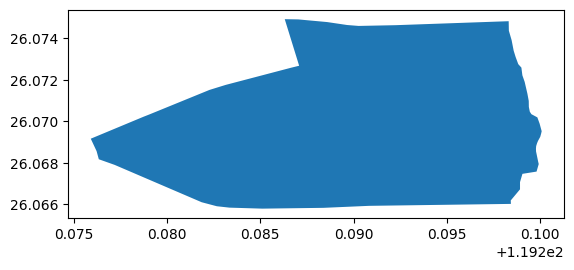

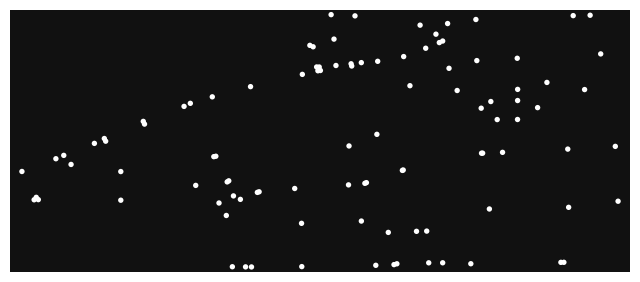

In [11]:
import osmnx as ox

ox.config(use_cache=True, log_console=True)

# define the place query
query = {'city': 'Shanghai'}

# get the boundaries of the place
gdf = ox.geocode_to_gdf(query)
gdf.plot()

# or just get the street network within the place
G = ox.graph_from_place(query, network_type='drive')
fig, ax = ox.plot_graph(G, edge_linewidth=0)

C:\Users\Shaoxuan Zhang\AppData\Local\Temp\ipykernel_2992\2635570741.py:3: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(log_console=True, use_cache=True)


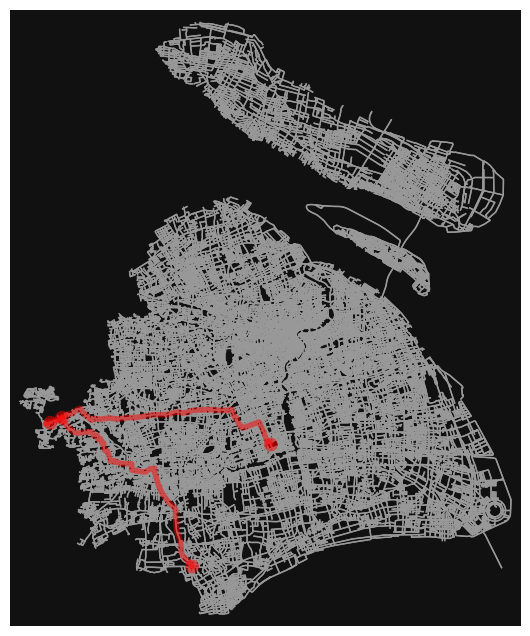

In [20]:
import networkx as nx
import osmnx as ox
ox.config(log_console=True, use_cache=True)

G = ox.graph_from_place('Shanghai, China', network_type='drive')

# pick 4 random nodes as origins/destinations for the 2 routes
orig1 = list(G.nodes())[0]
dest1 = list(G.nodes())[-1]
orig2 = list(G.nodes())[50]
dest2 = list(G.nodes())[-50]

# calculate shortest paths for the 2 routes
route1 = nx.shortest_path(G, orig1, dest1, weight='length')
route2 = nx.shortest_path(G, orig2, dest2, weight='length')

# create route colors
rc1 = ['r'] * (len(route1) - 1)
rc2 = ['b'] * len(route2)
rc = rc1 + rc2
nc = ['r', 'r', 'b', 'b']

# plot the routes
fig, ax = ox.plot_graph_routes(G, [route1, route2], route_color=rc, node_size=0)